<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [27]:
# código
import pandas as pd
from glob import glob

archivos = glob('Archivos/*.txt')
tmp = []

for a in archivos:
    tmp.append(pd.read_csv(a, header=None, names = [a[a.index('/')+1:a.index('.')]]))

ds = pd.concat(tmp, axis=1)

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

def propiedades(ds, column, charts=False):
    desc = ds[column].describe()
    if charts:
        if ds[column].dtype in ['int64', 'float64']:
            sns.boxplot(ds[column])
        else:
            tmp = ds.groupby(column).aggregate({column:'count'})
            sns.barplot(x=tmp.index, y=tmp[column])

        plt.show()
        
    return desc
    

edad


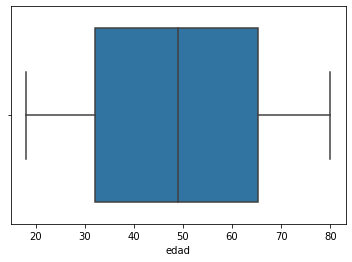

count    500.000000
mean      48.748000
std       18.613474
min       18.000000
25%       32.000000
50%       49.000000
75%       65.250000
max       80.000000
Name: edad, dtype: float64
estrato


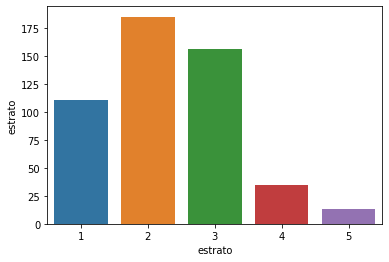

count     500
unique      5
top         2
freq      185
Name: estrato, dtype: object
region


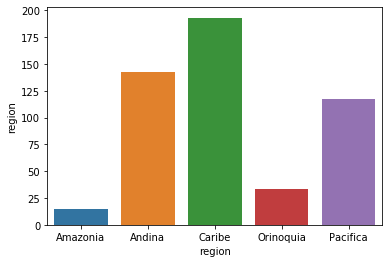

count        500
unique         5
top       Caribe
freq         193
Name: region, dtype: object
estado_civil


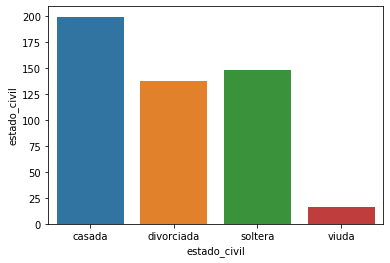

count        500
unique         4
top       casada
freq         199
Name: estado_civil, dtype: object
promedio


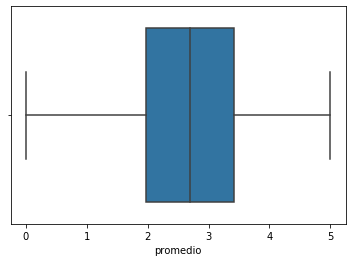

count    500.000000
mean       2.621200
std        1.117035
min        0.000000
25%        1.975000
50%        2.700000
75%        3.425000
max        5.000000
Name: promedio, dtype: float64
escolaridad


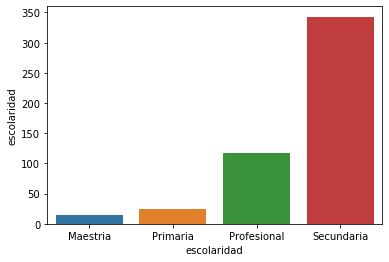

count            500
unique             4
top       Secundaria
freq             343
Name: escolaridad, dtype: object
genero


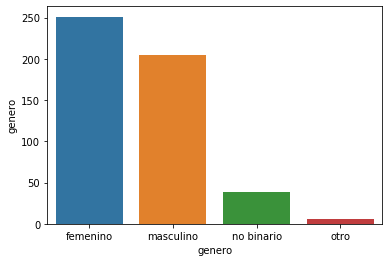

count          500
unique           4
top       femenino
freq           251
Name: genero, dtype: object


In [209]:
for c in ds.columns:
    print(c)
    print(propiedades(ds,c, True))

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [49]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = '¿Cuál es el mejor criterio para seleccionar los becarios?'

pregunta_analytics = '¿Cómo segmentar la población de acuerdo a las características de la misma e identificar grupo de interés?'

In [50]:
print(len(pregunta_negocio))
print(len(pregunta_analytics))

57
105


**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [260]:
# código
import math
import numpy as np

def selector_becas_metodo_a(ds, column, becas):
    flag = True
    poblacion = dict()
    vector_base = dict()
    matriz_asignacion = dict()
    

    for i in sorted(ds[column].unique()):
        poblacion[i] = ds.loc[ds[column] == i].shape[0]
        vector_base[i] = math.ceil(ds.loc[ds[column] == i].shape[0]*factor)
    
    for i in vector_base.keys():
        matriz_asignacion[i] = 0
    
    while flag:
        for i in vector_base.keys():
            if vector_base[i] + sum(matriz_asignacion.values())<becas:
                matriz_asignacion[i] = min(vector_base[i] + matriz_asignacion[i], poblacion[i])
            else:
                matriz_asignacion[i] = min(becas - sum(matriz_asignacion.values())+matriz_asignacion[i], poblacion[i])
                flag = False
                break
        if sum(matriz_asignacion.values())==sum(poblacion.values()):
            flag = False
    
    tmp = []
    
    for i in ds[column].unique():
        tmp.append(ds.loc[ds[column] == i].iloc[:int(matriz_asignacion[i]),:])
        
    tmp = pd.concat(tmp)
    
    return matriz_asignacion, tmp

becas = 50
factor = .02

ds.sort_values(by=['promedio'], inplace=True, ascending=False)

#if becas>ds.shape[0]:
 #   ds_metodo_a = ds.copy()
#else:
summary, ds_metodo_a = selector_becas_metodo_a(ds, 'estrato', becas)

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [263]:
# código

def selector_becas_metodo_b(ds, columns, criterio, becas):
    if (len(columns)!=2):
        print("No es posible asignar, se necesitan dos columnas")
        return dict()
    else:
        tmp = ds.groupby(columns).aggregate({columns[0]:'count',
                                             criterio:'mean'
                                            })
        tmp.columns = ['value','mean']
        tmp.reset_index(inplace=True)

        matriz_asignacion = dict()
        poblacion = dict()

        for i in tmp[columns + ['value']].values.tolist():
            poblacion[(i[0],i[1])] = i[2]
            matriz_asignacion[(i[0],i[1])] = 0

        flag = True

        while flag:
            for i in tmp[columns].values.tolist():
                if sum(matriz_asignacion.values())<becas:
                    matriz_asignacion[tuple(i)] = min(matriz_asignacion[tuple(i)]+1, poblacion[tuple(i)])
                else:
                    flag = False

            if sum(matriz_asignacion.values())==sum(poblacion.values()):
                flag = False
        
        tmp = []
    
        for i in matriz_asignacion.keys():
            tmp.append(ds.loc[np.logical_and(ds[columns[0]] == i[0],
                                             ds[columns[1]] == i[1])
                             ].iloc[:int(matriz_asignacion[i]),:])

        tmp = pd.concat(tmp)
        
        return matriz_asignacion,tmp
    
becas=50

ds.sort_values(by=['region', 'genero', 'promedio'], inplace=True, ascending=[True, True, False])
summary, ds_metodo_b = selector_becas_metodo_b(ds, ['region', 'genero'], 'promedio', becas)

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

*****************
Método 1
edad


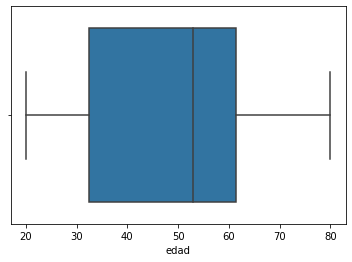

estrato


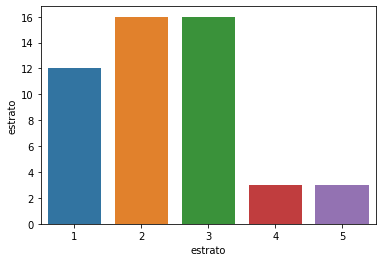

region


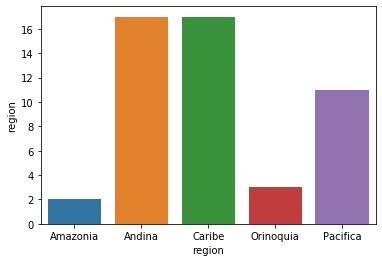

estado_civil


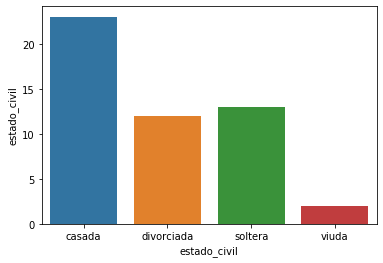

promedio


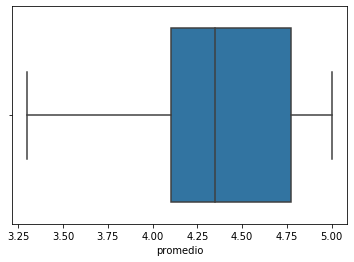

escolaridad


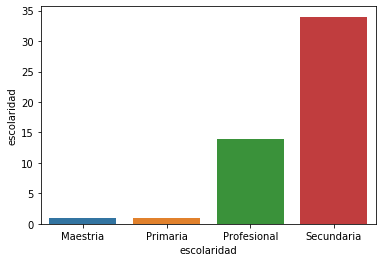

genero


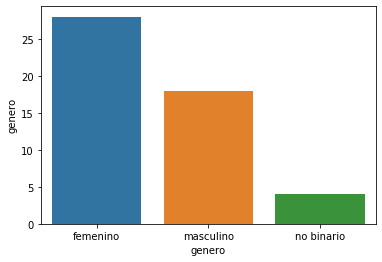


*****************
Método 2
edad


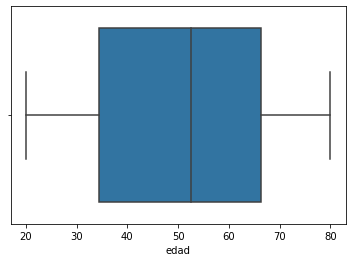

estrato


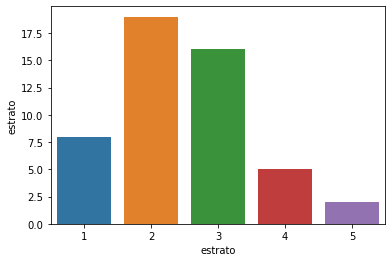

region


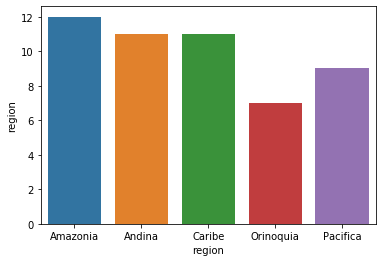

estado_civil


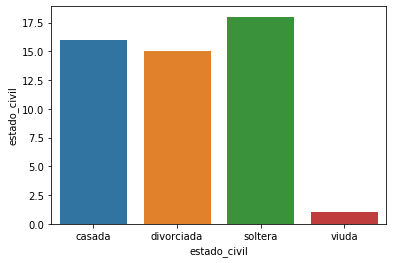

promedio


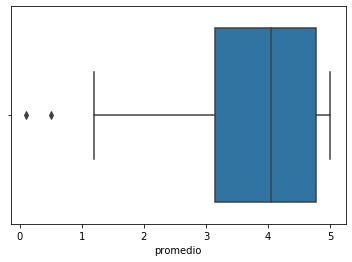

escolaridad


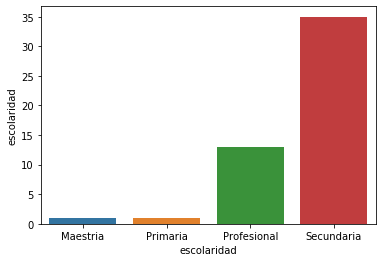

genero


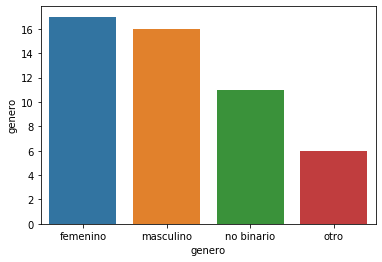

edad
Medias:  48.88 50.88
Min:  20.0 20.0
Max:  80.0 80.0
estrato
region
estado_civil
promedio
Medias:  4.3759999999999994 3.772
Min:  3.3 0.1
Max:  5.0 5.0
escolaridad
genero


In [281]:
prop_metodo_a = dict()
prop_metodo_b = dict()

print('*****************')
print('Método 1')
for c in ds_metodo_a.columns:
    print(c)
    prop_metodo_a[c] = propiedades(ds_metodo_a, c, charts=True)

print('')
print('*****************')
print('Método 2')
for c in ds_metodo_b.columns:
    print(c)
    prop_metodo_b[c] = propiedades(ds_metodo_b, c, charts=True)
    
for c in prop_metodo_a.keys():
    try:
        print(c)
        print('Medias: ', prop_metodo_a[c]['mean'], prop_metodo_b[c]['mean'])
        print('Min: ', prop_metodo_a[c]['min'], prop_metodo_b[c]['min'])
        print('Max: ', prop_metodo_a[c]['max'], prop_metodo_b[c]['max'])
    except:
        continue

## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

¿Cuál es el mínimo de edad? 18
¿Cuál es el máximo de edad? 40

Distribución por géneros
            genero
genero            
femenino        97
masculino       71
no binario      15
otro             2

Distribución por estratos
         estrato
estrato         
1             38
2             75
3             57
4             10
5              5

Distribución por región
           region
region           
Amazonia        9
Andina         46
Caribe         70
Orinoquia      16
Pacifica       44

¿Cuál criterio desea usar para segmentar a la población? (a:Género, b:Estrato, c:Región) c
Proporción de becarios para Amazonia (Si es 5%, Ingrese 5) 1
Proporción de becarios para Andina (Si es 5%, Ingrese 5) 20
Proporción de becarios para Caribe (Si es 5%, Ingrese 5) 10
Proporción de becarios para Orinoquia (Si es 5%, Ingrese 5) 5
Proporción de becarios para Pacifica (Si es 5%, Ingrese 5) 10
edad


/Users/germanpenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


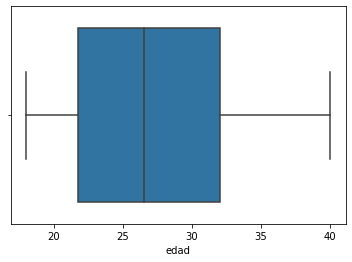

count    24.000000
mean     27.375000
std       6.418807
min      18.000000
25%      21.750000
50%      26.500000
75%      32.000000
max      40.000000
Name: edad, dtype: float64
estrato


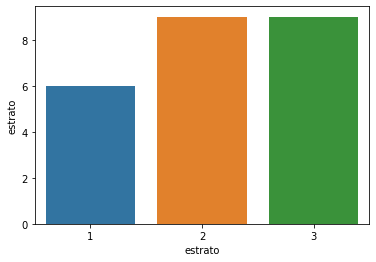

count     24
unique     3
top        3
freq       9
Name: estrato, dtype: object
region


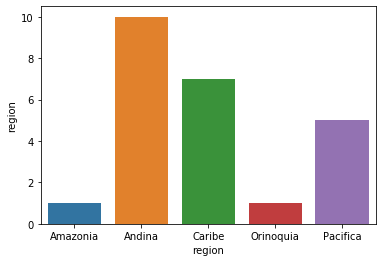

count         24
unique         5
top       Andina
freq          10
Name: region, dtype: object
estado_civil


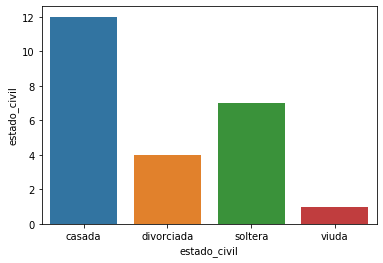

count         24
unique         4
top       casada
freq          12
Name: estado_civil, dtype: object
promedio


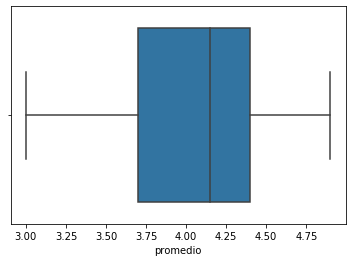

count    24.000000
mean      4.116667
std       0.497530
min       3.000000
25%       3.700000
50%       4.150000
75%       4.400000
max       4.900000
Name: promedio, dtype: float64
escolaridad


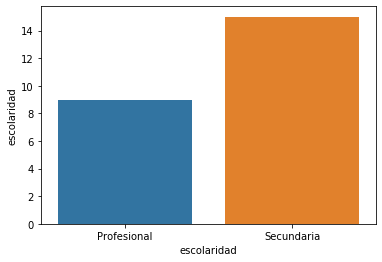

count             24
unique             2
top       Secundaria
freq              15
Name: escolaridad, dtype: object
genero


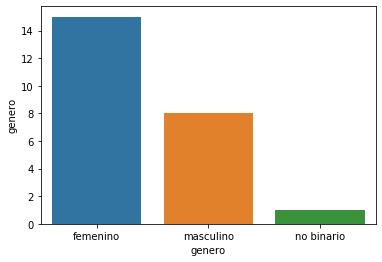

count           24
unique           3
top       femenino
freq            15
Name: genero, dtype: object


In [311]:
# código
max_e = 0
min_e = int(input("¿Cuál es el mínimo de edad? "))
while max_e<min_e:
    max_e = int(input("¿Cuál es el máximo de edad? "))

ds_edad = ds.loc[np.logical_and(ds.edad>=min_e, ds.edad<=max_e)]

print('')
print('Distribución por géneros')
print(ds_edad.groupby('genero').aggregate({'genero':'count'}))
print('')
print('Distribución por estratos')
print(ds_edad.groupby('estrato').aggregate({'estrato':'count'}))
print('')
print('Distribución por región')
print(ds_edad.groupby('region').aggregate({'region':'count'}))

print('')
criterio = input('¿Cuál criterio desea usar para segmentar a la población? (a:Género, b:Estrato, c:Región) ')

if criterio == 'a':
    column = 'genero'
elif criterio == 'b':
    column = 'estrato'
else:
    column = 'region'
    
razones = dict()
poblacion = dict()

for i in ds_edad[column].unique():
    razones[i] = int(input('Proporción de becarios para '+str(i)+' (Si es 5%, Ingrese 5) '))/100
    poblacion[i] = ds_edad.loc[ds_edad[column]==i].shape[0]
    
ds_edad.sort_values(by=['promedio'], inplace=True, ascending=False)

ds_criterios = []
for i in razones.keys():
    ds_criterios.append(ds_edad.loc[ds_edad[column]==i].iloc[:math.ceil(razones[i]*poblacion[i]),:])
    
ds_criterios = pd.concat(ds_criterios)

for c in ds_criterios.columns:
    print(c)
    print(propiedades(ds_criterios, c, charts=True))

**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [282]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'De acuerdo a las metodologías, la mejor opción es usar un criterio para segmentar la población y a partir de allí elegir los mejores (agregar un punto de corte en el promedio). Cuando se agregan varios criterios con un método uniforme como en el segundo caso, se elige gente con promedios muy bajos'

In [284]:
print(len(respuesta))

298


**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [ ]:
# código

conclusion = 'Si solo se usa un criterio y se ordena la población por promedio, se logra una repartición que puede funcionar. Solo le recomendaría al comité agregar un promedio mínimo de tal manera que se pueda hacer una asginación que tenga en cuenta los méritos académicos'

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21